# Neural Network Day 1 

For this task we will uses wine dataset 

In [2]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Convert to DataFrame for easier exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['cultivar'] = y

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivar
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


cultivar
1    71
0    59
2    48
Name: count, dtype: int64


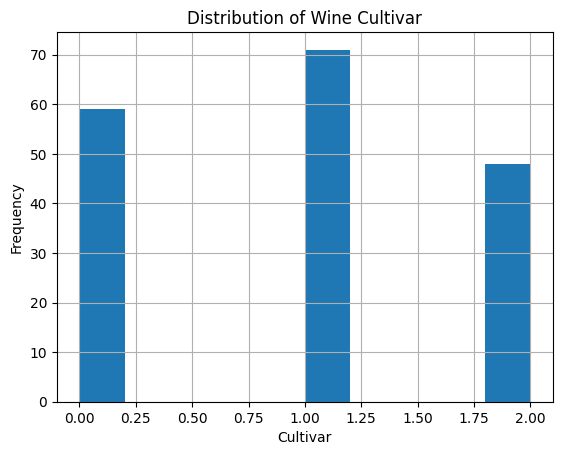

In [5]:
# Analyze the distribution of the target variable (cultivar)
print(df['cultivar'].value_counts())
df['cultivar'].hist()
plt.xlabel('Cultivar')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Cultivar')
plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Build the Neural Network Model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer and first hidden layer with 64 neurons and ReLU activation
    Dense(32, activation='relu',),   # Second hidden layer with 32 neurons and ReLU activation
    Dense(3, activation='softmax',)  # Output layer with softmax activation for multi-class classification
])

/Users/nokkyu/Documents/greenbootcamps/machinelearning/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Compile the Model
model.compile(optimizer='adam',  # Use the default Adam optimizer
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy loss
              metrics=['accuracy'])  # Track accuracy during training


In [10]:
#Train the Model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)  # Train for 50 epochs with 20% validation split


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2862 - loss: 1.2225 - val_accuracy: 0.2759 - val_loss: 1.0416
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3366 - loss: 1.0798 - val_accuracy: 0.4483 - val_loss: 0.9125
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4328 - loss: 0.9459 - val_accuracy: 0.6207 - val_loss: 0.8070
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6788 - loss: 0.8571 - val_accuracy: 0.8276 - val_loss: 0.7180
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8071 - loss: 0.7339 - val_accuracy: 0.8276 - val_loss: 0.6413
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8469 - loss: 0.6762 - val_accuracy: 0.8966 - val_loss: 0.5750
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9411 - loss: 0.6183 - val_accuracy: 0.9310 - val_loss: 0.5157
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9358 - loss: 0.5225 - val_accuracy: 0.9310 - val_loss: 0.4631
Epoch 9

In [11]:
#Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0121 
Test Accuracy: 1.00%


In [12]:
#Visualize the Architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,227 (36.05 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,152 (24.04 KB)

In [13]:
# Make Predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


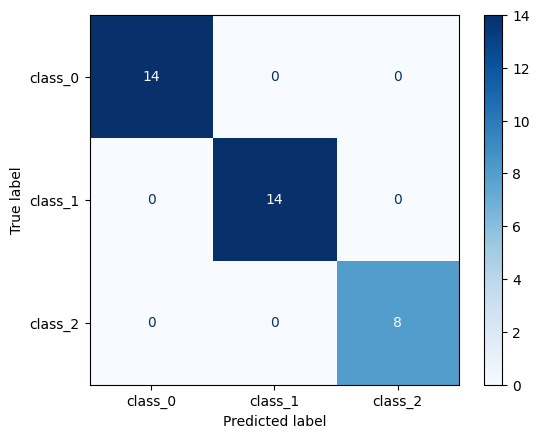

In [14]:
# Display Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()